# Deployment 

* create a deployment folder.
* create a simple app.py file.
* create a virtual environment
    * conda create -n flaskdeploy flask (the flask means to install flask). 
    * Normally, we should now run 'pip install ....' as we did before. Or we may install according to a requirement.txt. Here we only install flask for a simplest application, and it is already done. 
* Run the app.py locally and make sure it works. 
* pip install gunicorn
* pip freeze > requirements.txt
* In the deployment folder, create a file called Procfile, and type 'web: gunicorn app:app' (no quote) and save the file. 
* Type 'Heroku CLi' in Google and go to the page. First install Git and then Heroku CLI. See details below.
* Details about installation. 
    * I choose Atom for the default editor for git.
    * Currently I just use the default choice when during installation.
    * If need re-installation for full usage of Git, check first-time Git setup from web. 
    * Currently use this version of git for Heruko deployment purpose, and use Githup desktop for other services. 
    * After installing Git, install Heroku. 
    
* Create Heroku account: ljyang100@gmail.com with passwd AppleID + two underscores. 
* Create an app once logged in Heroku with a specified name. 
* Reopen Atom, go to the deployment folder, activate flaskdeploy (this may not matter). Then type 'heroku login'. Follow the steps and you will be logge in.
* Once logged in, stay in the deployment folder, type 'git init'
* Then type: `heroku git:remote -a my-flask-demo-app-lijun`, note the string my-flask-demo... is the app name I gave my app when creating a new app in Heroku. 
* git add .
* git commit -am "First commit"
* git push heroku master
* copy the https://my-flask-demo-app-lijun.herokuapp.com/ from the terminal and check whether it works. 

**Comments:** 
If I want to deploy the final big project to Heroku, then I need postgres for robust application.  

# Accepting-Payments-with-Flask
* Usually we are not necessarily handle payments by ourself (even with the following stripe) if we want open some online stores. There are many online solutions for online stores. 

## Setting up
* activate myflaskenv
* pip install --upgrade Stripe

### payme.py

In [ ]:
rom flask import Flask, render_template, request, redirect, url_for
import stripe

app = Flask(__name__)

public_key = 'pk_test_6pRNASCoBOKtIshFeQd4XMUh'
#This is the public key for working with fake credit card. Simiar for the api-key below

stripe.api_key = "sk_test_BQokikJOvBiI2HlWgH4olfQ2"

@app.route('/')
def index():
    return render_template('index.html', public_key=public_key)

@app.route('/thankyou')
def thankyou():
    return render_template('thankyou.html')

@app.route('/payment', methods=['POST'])
def payment():

    # CUSTOMER INFORMATION
    customer = stripe.Customer.create(email=request.form['stripeEmail'],
                                      source=request.form['stripeToken'])

    # CHARGE/PAYMENT INFORMATION
    charge = stripe.Charge.create(
        customer=customer.id,
        amount=1999,
        currency='usd',
        description='Donation'
    )

    return redirect(url_for('thankyou'))

if __name__ == '__main__':
    app.run(debug=True)


### index.html

In [ ]:
<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <meta charset="utf-8">
    <title></title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/css/bootstrap.min.css" integrity="sha384-9gVQ4dYFwwWSjIDZnLEWnxCjeSWFphJiwGPXr1jddIhOegiu1FwO5qRGvFXOdJZ4" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.0/umd/popper.min.js" integrity="sha384-cs/chFZiN24E4KMATLdqdvsezGxaGsi4hLGOzlXwp5UZB1LY//20VyM2taTB4QvJ" crossorigin="anonymous"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/js/bootstrap.min.js" integrity="sha384-uefMccjFJAIv6A+rW+L4AHf99KvxDjWSu1z9VI8SKNVmz4sk7buKt/6v9KI65qnm" crossorigin="anonymous"></script>
  </head>
  <body>



<div class="jumbotron">
  <h1>Welcome to our Puppy Donation Page</h1>
  <h2>Would you like to donate to our adoption agency?</h2>
  {# THIS IS A TEST KEY. TO FIND YOUR OWN KEY, LOG IN TO YOUR STRIPE ACCOUNT
  THEN GO TO: https://stripe.com/docs/quickstart #}
  <form action="{{url_for('payment')}}" method="POST">
    <script
      src="https://checkout.stripe.com/checkout.js" class="stripe-button"
      data-key={{public_key}}
      data-amount="1999"
      data-name="Puppy Adoption"
      data-description="Donation"
      data-image="https://images.unsplash.com/photo-1514984879728-be0aff75a6e8?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjEyMDd9&s=35dcb9bb6f3e097541dd732a99c44766&auto=format&fit=crop&w=1576&q=80"
      data-locale="auto"
      data-zip-code="true">
    </script>
  </form>

</div>

</body>
</html>


### Thankyou.html

In [ ]:
<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <meta charset="utf-8">
    <title></title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/css/bootstrap.min.css" integrity="sha384-9gVQ4dYFwwWSjIDZnLEWnxCjeSWFphJiwGPXr1jddIhOegiu1FwO5qRGvFXOdJZ4" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.0/umd/popper.min.js" integrity="sha384-cs/chFZiN24E4KMATLdqdvsezGxaGsi4hLGOzlXwp5UZB1LY//20VyM2taTB4QvJ" crossorigin="anonymous"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.0/js/bootstrap.min.js" integrity="sha384-uefMccjFJAIv6A+rW+L4AHf99KvxDjWSu1z9VI8SKNVmz4sk7buKt/6v9KI65qnm" crossorigin="anonymous"></script>
  </head>
  <body>
    <div class="jumbotron">
      <h1>Thank you for your donation!</h1>

    </div>

  </body>
  </html>

## Company social blog

General structure of the project

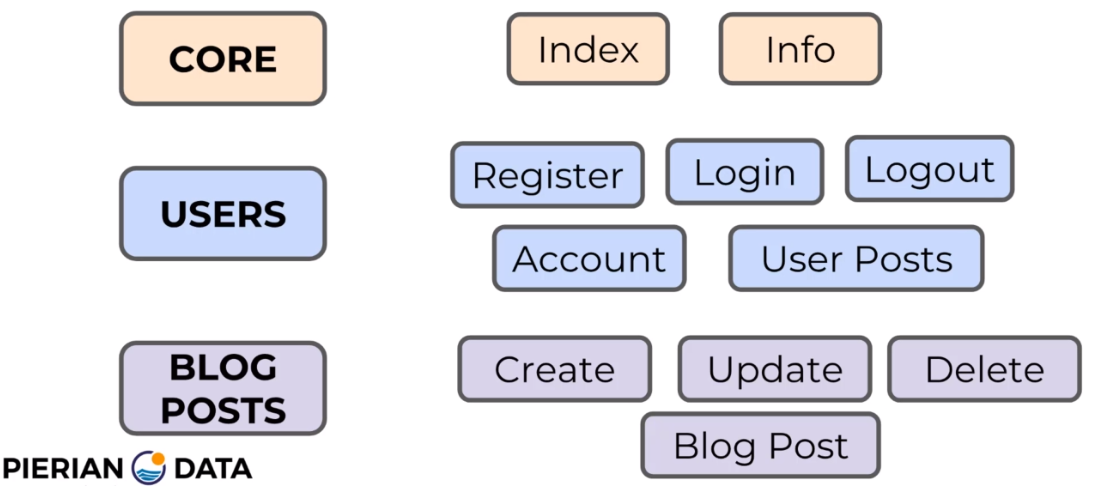

Below are models (tables)

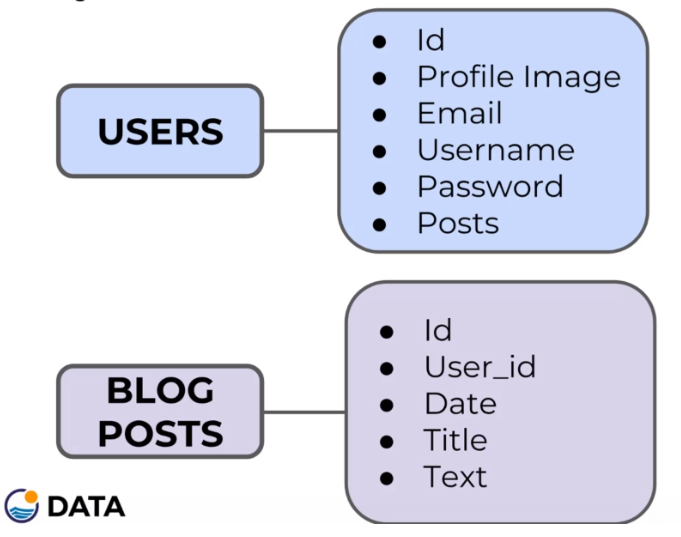

**Comments**
* Unlike the Section 11 about 'large Flask application', here we put all the html templates into one top-level templates folder, rather than in the sub-templates folder for each models. 
* 

### .py files

**__init__.py

In [ ]:
import os
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from flask_migrate import Migrate
from flask_login import LoginManager


app = Flask(__name__)

#############################################################################
############ CONFIGURATIONS (CAN BE SEPARATE CONFIG.PY FILE) ###############
###########################################################################

# Remember you need to set your environment variables at the command line
# when you deploy this to a real website.
# export SECRET_KEY=mysecret
# set SECRET_KEY=mysecret
app.config['SECRET_KEY'] = 'mysecret'

#################################
### DATABASE SETUPS ############
###############################

basedir = os.path.abspath(os.path.dirname(__file__))
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///' + os.path.join(basedir, 'data.sqlite')
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False


db = SQLAlchemy(app)
Migrate(app,db)


###########################
#### LOGIN CONFIGS #######
#########################

login_manager = LoginManager()

# We can now pass in our app to the login manager
login_manager.init_app(app)

# Tell users what view to go to when they need to login.
login_manager.login_view = "users.login"


###########################
#### BLUEPRINT CONFIGS #######
#########################

# Import these at the top if you want
# We've imported them here for easy reference
from puppycompanyblog.core.views import core
from puppycompanyblog.users.views import users
from puppycompanyblog.blog_posts.views import blog_posts
from puppycompanyblog.error_pages.handlers import error_pages

# Register the apps
app.register_blueprint(users)
app.register_blueprint(blog_posts)
app.register_blueprint(core)
app.register_blueprint(error_pages)


**models.py**

In [ ]:
from puppycompanyblog import db,login_manager
from datetime import datetime
from werkzeug.security import generate_password_hash,check_password_hash
from flask_login import UserMixin
# By inheriting the UserMixin we get access to a lot of built-in attributes
# which we will be able to call in our views!
# is_authenticated()
# is_active()
# is_anonymous()
# get_id()


# The user_loader decorator allows flask-login to load the current user
# and grab their id.

@login_manager.user_loader
def load_user(user_id):
    return User.query.get(user_id)

class User(db.Model, UserMixin):

    # Create a table in the db
    __tablename__ = 'users'

    id = db.Column(db.Integer, primary_key = True)
    profile_image = db.Column(db.String(20), nullable=False, default='default_profile.png')
    email = db.Column(db.String(64), unique=True, index=True)
    username = db.Column(db.String(64), unique=True, index=True)
    password_hash = db.Column(db.String(128))
    # This connects BlogPosts to a User Author.
    posts = db.relationship('BlogPost', backref='author', lazy=True)
    #'BlogPost' is another model defined in the same file. 
    #backref is for relation between a blogpost and a user. So it indicates the author of the BlogPost
    # is a user model. It is like an attribute call? 
    

    def __init__(self, email, username, password):
        self.email = email
        self.username = username
        self.password_hash = generate_password_hash(password)

    def check_password(self,password):
        # https://stackoverflow.com/questions/23432478/flask-generate-password-hash-not-constant-output
        return check_password_hash(self.password_hash,password)

    def __repr__(self):
        return f"UserName: {self.username}"

class BlogPost(db.Model):
    # Setup the relationship to the User table
    users = db.relationship(User)

    # Model for the Blog Posts on Website
    id = db.Column(db.Integer, primary_key=True)
    # Notice how we connect the BlogPost to a particular author
    user_id = db.Column(db.Integer, db.ForeignKey('users.id'), nullable=False)
    date = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)
    title = db.Column(db.String(140), nullable=False)
    text = db.Column(db.Text, nullable=False)

    def __init__(self, title, text, user_id):
        self.title = title
        self.text = text
        self.user_id =user_id


    def __repr__(self):
        return f"Post Id: {self.id} --- Date: {self.date} --- Title: {self.title}"


**handlers.py**

In [ ]:
from flask import Blueprint,render_template

error_pages = Blueprint('error_pages',__name__)

@error_pages.app_errorhandler(404)
def error_404(error):
    '''
    Error for pages not found.
    '''
    # Notice how we return a tuple!
    return render_template('error_pages/404.html'), 404
    #The above returns a tuple. This is because we use the '@error_pages.app_errorhandler(404)'
    #which is not the usual routing. 
    # Also 'error_pages/404.html' means that we have a subfolder under the top-level templates folder. 
    # Note in the base.html, when we access folder, we use '.'. Check it out whether my understanding is correct. 

@error_pages.app_errorhandler(403)
def error_403(error):
    '''
    Error for trying to access something which is forbidden.
    Such as trying to update someone else's blog post.
    '''
    # Notice how we return a tuple!
    return render_template('error_pages/403.html'), 403


**forms.py**

In [ ]:
# Form Based Imports
from flask_wtf import FlaskForm
from wtforms import StringField, PasswordField, SubmitField
from wtforms.validators import DataRequired,Email,EqualTo
from wtforms import ValidationError
from flask_wtf.file import FileField, FileAllowed

# User Based Imports
from flask_login import current_user
from puppycompanyblog.models import User


class LoginForm(FlaskForm):
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    submit = SubmitField('Log In')


class RegistrationForm(FlaskForm):
    email = StringField('Email', validators=[DataRequired(),Email()])
    username = StringField('Username', validators=[DataRequired()])
    password = PasswordField('Password', validators=[DataRequired(), EqualTo('pass_confirm', message='Passwords Must Match!')])
    pass_confirm = PasswordField('Confirm password', validators=[DataRequired()])
    submit = SubmitField('Register!')

    def validate_email(self, field):
        # Check if not None for that user email!
        if User.query.filter_by(email=field.data).first():
            raise ValidationError('Your email has been registered already!')

    def validate_username(self, field):
        # Check if not None for that username!
        if User.query.filter_by(username=field.data).first():
            raise ValidationError('Sorry, that username is taken!')


class UpdateUserForm(FlaskForm):
    email = StringField('Email', validators=[DataRequired(),Email()])
    username = StringField('Username', validators=[DataRequired()])
    picture = FileField('Update Profile Picture', validators=[FileAllowed(['jpg', 'png'])])
    submit = SubmitField('Update')

    def validate_email(self, field):
        # Check if not None for that user email!
        if User.query.filter_by(email=field.data).first():
            raise ValidationError('Your email has been registered already!')

    def validate_username(self, field):
        # Check if not None for that username!
        if User.query.filter_by(username=field.data).first():
            raise ValidationError('Sorry, that username is taken!')

**picture_handler.py** 

In [ ]:
import os
# pip install pillow
from PIL import Image

from flask import url_for, current_app

def add_profile_pic(pic_upload,username):

    filename = pic_upload.filename
    # Grab extension type .jpg or .png
    ext_type = filename.split('.')[-1]
    storage_filename = str(username) + '.' +ext_type
    
    filepath = os.path.join(current_app.root_path, 'static\profile_pics', storage_filename)

    # Play Around with this size.
    output_size = (200, 200)

    # Open the picture and save it
    pic = Image.open(pic_upload)
    pic.thumbnail(output_size)
    pic.save(filepath)

    return storage_filename


**views.py** for users

In [ ]:
from flask import render_template, url_for, flash, redirect, request, Blueprint
from flask_login import login_user, current_user, logout_user, login_required
from puppycompanyblog import db
from werkzeug.security import generate_password_hash,check_password_hash
from puppycompanyblog.models import User, BlogPost
from puppycompanyblog.users.forms import RegistrationForm, LoginForm, UpdateUserForm
from puppycompanyblog.users.picture_handler import add_profile_pic


users = Blueprint('users', __name__)

@users.route('/register', methods=['GET', 'POST'])
def register():
    form = RegistrationForm()

    if form.validate_on_submit():
        user = User(email=form.email.data,
                    username=form.username.data,
                    password=form.password.data)

        db.session.add(user)
        db.session.commit()
        flash('Thanks for registering! Now you can login!')
        return redirect(url_for('users.login'))
    return render_template('register.html', form=form)

@users.route('/login', methods=['GET', 'POST'])
def login():

    form = LoginForm()
    if form.validate_on_submit():
        # Grab the user from our User Models table
        user = User.query.filter_by(email=form.email.data).first()

        # Check that the user was supplied and the password is right
        # The verify_password method comes from the User object
        # https://stackoverflow.com/questions/2209755/python-operation-vs-is-not

        if user.check_password(form.password.data) and user is not None:
            #Log in the user

            login_user(user)
            flash('Logged in successfully.')

            # If a user was trying to visit a page that requires a login
            # flask saves that URL as 'next'.
            next = request.args.get('next')

            # So let's now check if that next exists, otherwise we'll go to
            # the welcome page.
            if next == None or not next[0]=='/':
                next = url_for('core.index')

            return redirect(next)
    return render_template('login.html', form=form)




@users.route("/logout")
def logout():
    logout_user()
    return redirect(url_for('core.index'))
    #We cannot use 'index' directly as we are using blueprint


@users.route("/account", methods=['GET', 'POST'])
@login_required
def account():

    form = UpdateUserForm()

    if form.validate_on_submit():
        print(form)
        if form.picture.data:
            username = current_user.username
            pic = add_profile_pic(form.picture.data,username)
            current_user.profile_image = pic

        current_user.username = form.username.data
        current_user.email = form.email.data
        db.session.commit()
        flash('User Account Updated')
        return redirect(url_for('users.account'))

    elif request.method == 'GET':
        form.username.data = current_user.username
        form.email.data = current_user.email

    profile_image = url_for('static', filename='profile_pics/' + current_user.profile_image)
    return render_template('account.html', profile_image=profile_image, form=form)


@users.route("/<username>")
def user_posts(username):
    page = request.args.get('page', 1, type=int)
    user = User.query.filter_by(username=username).first_or_404()
    blog_posts = BlogPost.query.filter_by(author=user).order_by(BlogPost.date.desc()).paginate(page=page, per_page=5)
    return render_template('user_blog_posts.html', blog_posts=blog_posts, user=user)


### base.html
Be aware the core.index in the following sentence. 
<a href="{{url_for('core.index')}}">Home</a> 

In [ ]:
<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>

    <meta charset="utf-8">
    <title></title>
  </head>
  <body>

    <ul class='nav'>
      <li class='nav-link'>
        <a href="{{url_for('core.index')}}">Home</a> 
      </li>
      <li class='nav-link'>
        <a href="{{url_for('core.info')}}">About</a>
      </li>

      {% if current_user.is_authenticated %}
      <li class='nav-link'>
        <a href="{{url_for('users.logout')}}">Log Out</a>
      </li>
      <li class='nav-link'>
        <a href="{{url_for('users.account')}}">Account</a>
      </li>
      <li class='nav-link'>
        <a href="#">Create Post</a>
      </li>
      {% else %}
      <li class='nav-link'>
        <a href="{{url_for('users.login')}}">Log In</a>
      </li>
      <li class='nav-link'>
        <a href="{{url_for('users.register')}}">Register</a>
      </li>
      {% endif %}

    </ul>
<div class="container">
  {% block content %}

  {% endblock %}
</div>


  </body>
</html>


**create_post.html**
Note we can always modify the style of forms with CSS or Bootstrap. For example, within the () of form.email() add extra stuff.

In [ ]:
{% extends "base.html" %}
{% block content %}
<form method="POST">
    {# This hidden_tag is a CSRF security feature. #}
    {{ form.hidden_tag() }}
    {{ form.email.label }} {{ form.email() }}<br>
    {{ form.username.label }} {{ form.username() }}<br>
    {{ form.password.label }} {{ form.password() }}<br>
    {{ form.pass_confirm.label }} {{ form.pass_confirm() }}<br>
    {{ form.submit() }}
</form>
{% endblock %}
